In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
datasets = [
    "ETTh1", "ETTh2", "ETTm1", "ETTm2",
    "Weather", "ECL", "Traffic", "ILI"
]

colors = ['#2878B5', '#9AC9DB']  # 蓝色系配色


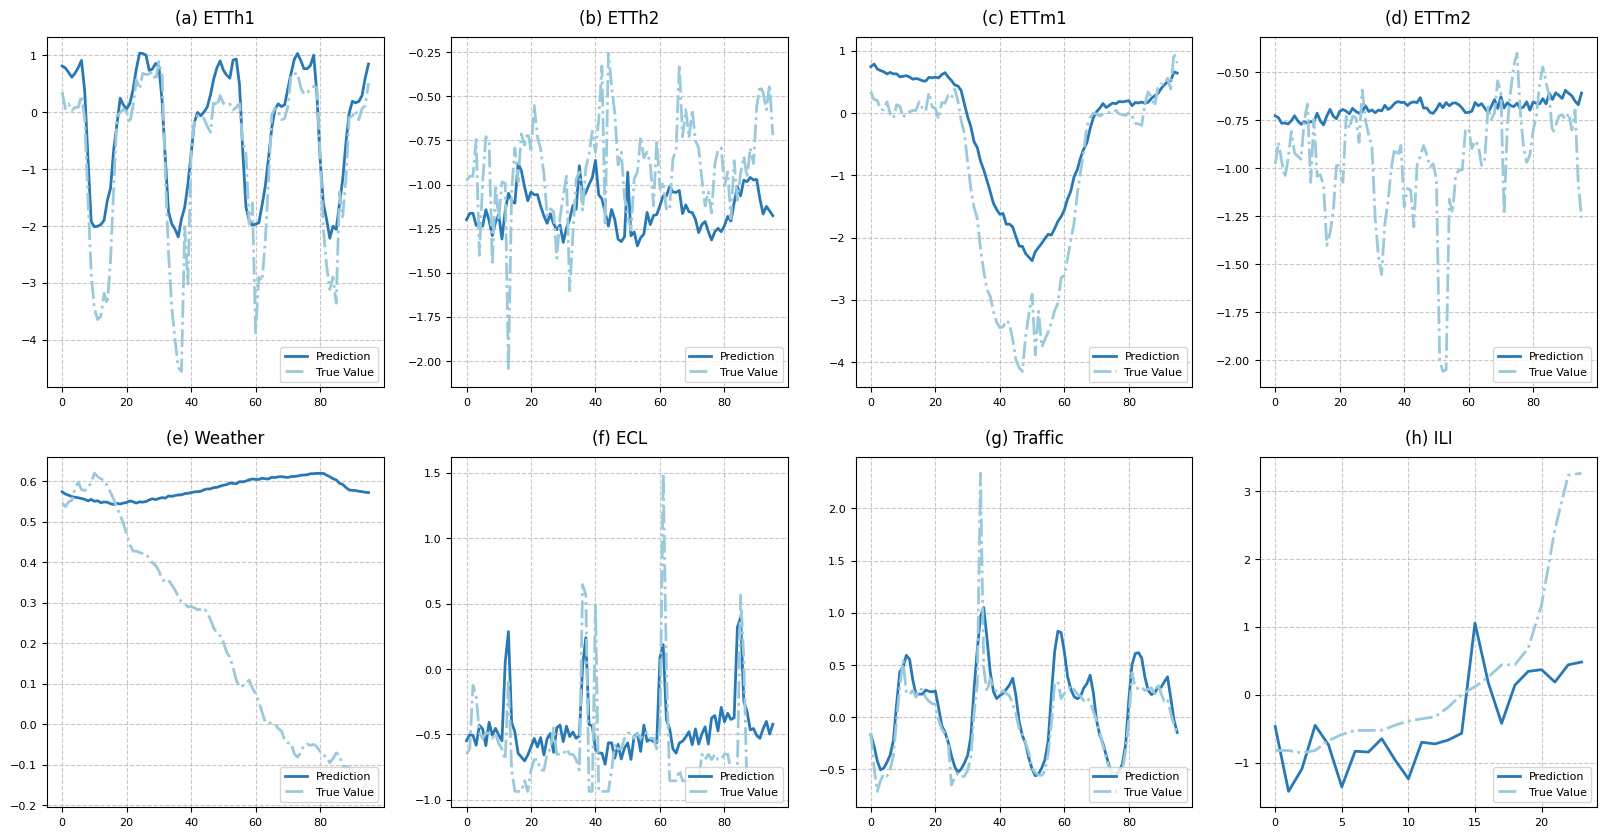

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()  # 将二维数组展平以便于迭代

for i, dataset in enumerate(datasets):
    pred_path = f"./vis_forecasting/{dataset}/pred.npy"
    true_path = f"./vis_forecasting/{dataset}/true.npy"
    try:
        pred = np.load(pred_path)[0,:,0]
        true = np.load(true_path)[0,:,0]
        
        ax = axes[i]
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.plot(pred, label='Prediction', linestyle='-',color=colors[0],linewidth=2)
        ax.plot(true, label='True Value', linestyle='-.',color=colors[1],linewidth=2)
        
        ax.set_title(f"({chr(97 + i)}) {dataset}", loc='center',pad=10,fontsize=12)  # 设置标题位置在x轴下方
        #ax.set_xlabel('Time Steps', fontsize=12)
        #ax.set_ylabel('Value', fontsize=10)

        # 设置刻度标签的大小
        ax.tick_params(axis='both', labelsize=8)
        
        # 为每个子图添加图例
        ax.legend(loc='lower right', fontsize=8)
            
    except FileNotFoundError:
        print(f"Data not found for {dataset}. Skipping.")
        continue

plt.savefig('forecasting_plots.pdf', dpi=300, bbox_inches='tight')
plt.show()